# PLAYING WITH APIs

In [2]:
# Import relevant libraries
import requests
import json
import pandas as pd

## Pokemon vs locations

In [ ]:
# Get the data from the API
url = "https://pokeapi.co/api/v2/location-area"
response = requests.get(url)

print(response.status_code) # Successful (200)


In [ ]:
# Save and check the data
print(response.headers['Content-Type']) # application/json; charset=utf-8 -> JSON data!
data = response.json()
data # See what they looks like: location areas are stored in 'results' key


In [ ]:
# Print the names of the locations
for location in data['results']:
    print(location['name'])

# Save the locations in variable
locations = [location['name'] for location in data['results']]
locations

In [ ]:
# Get Pokemon data per each location
for location in locations:
    location_url = f"https://pokeapi.co/api/v2/location-area/{location}/"
    response = requests.get(location_url)
    if response.status_code == 200:
        data = response.json()
        pokemon_list = [species['pokemon']['name'] for species in data['pokemon_encounters']]
        print(f"\nPokémon in {location}: {pokemon_list}")
    else:
        print(f"Failed to retrieve Pokémon for location: {location}")

In [ ]:
# Edit the code above to create a dictionary with locations and their respective Pokémon
pokemon_data = []
for location in locations:
    location_url = f"https://pokeapi.co/api/v2/location-area/{location}/"
    response = requests.get(location_url)
    if response.status_code == 200:
        data = response.json()
        pokemon_list = [species['pokemon']['name'] for species in data['pokemon_encounters']]
        pokemon_data.append({'Location': location, 'Pokemon': pokemon_list})
    else:
        print(f"Failed to retrieve Pokémon for location: {location}")

In [ ]:
# Create a DataFrame from the dictionary
df = pd.DataFrame(pokemon_data)
print(df)

## Analysing Pokemon types

In [ ]:
# Get the data from the API
type_list_url = "https://pokeapi.co/api/v2/type/"
response = requests.get(type_list_url)
print(response.headers['Content-Type']) # application/json; charset=utf-8 -> JSON data!

application/json; charset=utf-8


In [ ]:
# Save and check the data
if response.status_code == 200:
    type_data = response.json()
    type_names = [t['name'] for t in type_data['results']]
    print(type_names)

['normal', 'fighting', 'flying', 'poison', 'ground', 'rock', 'bug', 'ghost', 'steel', 'fire', 'water', 'grass', 'electric', 'psychic', 'ice', 'dragon', 'dark', 'fairy', 'stellar', 'unknown']


In [ ]:
# Create a dictionary to store the Pokemon type data
all_records = []

for type_name in type_names:
    type_url = f"https://pokeapi.co/api/v2/type/{type_name}/"
    type_response = requests.get(type_url)
    
    if type_response.status_code == 200:
        type_info = type_response.json()
        for type in type_info['pokemon']:
            pokemon_name = type['pokemon']['name']
            all_records.append({'Pokemon': pokemon_name, 'Type': type_name})
    else:
        print(f"Failed to get data for type: {type_name}")

Failed to get data for type: fighting
Failed to get data for type: grass
Failed to get data for type: dark
Failed to get data for type: stellar
Failed to get data for type: unknown


In [ ]:
# Create DataFrame
df = pd.DataFrame(all_records)
print(df)

               Pokemon    Type
0               pidgey  normal
1            pidgeotto  normal
2              pidgeot  normal
3              rattata  normal
4             raticate  normal
...                ...     ...
1677    zacian-crowned   fairy
1678    hatterene-gmax   fairy
1679   grimmsnarl-gmax   fairy
1680     alcremie-gmax   fairy
1681  enamorus-therian   fairy

[1682 rows x 2 columns]


C:\Users\albiv\AppData\Local\Temp\ipykernel_6868\1488881110.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Type', y='Count', data=type_counts, palette='viridis')


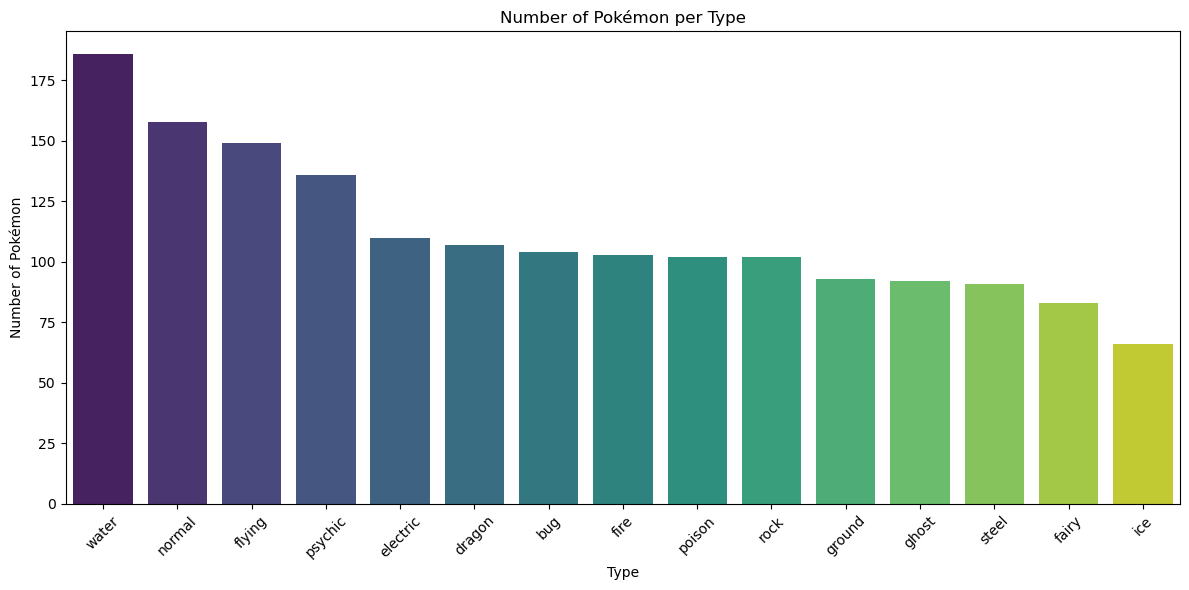

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count Pokémon per type
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Type', y='Count', data=type_counts, palette='viridis')

plt.title('Number of Pokémon per Type')
plt.xlabel('Type')
plt.ylabel('Number of Pokémon')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
